In [412]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

In [452]:
folder_name = r"/home/justin/Documents/rlkit/output/sawyer-reach-sim-2d/2019_05_10_14_43_25"
file_name = folder_name + "/progress.csv"
data = pd.read_csv(file_name)
data.head()

,Policy log std Max,Epoch Time (s),Z mean eval,Z variance eval,Log Pis Mean,Number of rollouts total,V Predictions Mean,TestFinalReturns,Policy mu Mean,Log Pis Max,...,Number of env steps total,KL Divergence,AverageFinalReturn_all_train_tasks,AverageReturn_all_test_tasks,Stddev_AverageReturn_all_train_tasks,AverageFinalReturn_all_test_tasks,Q Predictions Max,Total Train Time (s),Stddev_AverageFinalReturn_all_train_tasks,Train Time (s)
0,0.001660,183.668609,0.090607,1.664517,-1.339608,0,-0.003763,"[-0.16676114440110734, -0.1447330495854257, -0...",0.001875,-0.523767,...,3000,141.474980,-0.190818,-2.919333,0.367696,-0.194309,0.003853,192.440839,0.036047,112.061055
1,-0.153164,118.243388,2.725097,1.496051,-1.350070,0,-70.919940,"[-0.059491517082109854, -0.16573211297591317, ...",0.064962,-0.884888,...,6000,1.735403,-0.156520,-3.112765,0.324194,-0.258439,-67.898415,795.975319,0.103976,114.666536
2,-0.121351,118.440871,0.257348,0.156043,-1.292631,0,-449.872100,"[-0.1389653272167325, -0.20735395203041326, -0...",-0.115872,0.216958,...,9000,53.315350,-0.173460,-2.984419,1.070032,-0.197898,-429.855560,1398.233753,0.085759,114.824506
3,-0.119682,118.143818,0.474058,0.161333,-0.863593,0,-755.414400,"[-0.07220642127225563, -0.15410432455719592, -...",-0.265219,0.838169,...,12000,100.413490,-0.189743,-3.062688,1.037237,-0.218339,-650.750240,1999.057804,0.079950,114.438175
4,-0.153009,118.511555,0.746630,0.109980,-0.667485,0,-977.305300,"[-0.12092339777487505, -0.1420069698031987, -0...",0.215294,2.267681,...,15000,105.634110,-0.177366,-3.182232,1.231990,-0.237044,-801.252300,2601.013134,0.065375,114.811895


In [453]:
data.columns

Index(['Policy log std Max', 'Epoch Time (s)', 'Z mean eval',
       'Z variance eval', 'Log Pis Mean', 'Number of rollouts total',
       'V Predictions Mean', 'TestFinalReturns', 'Policy mu Mean',
       'Log Pis Max', 'Log Pis Min', 'AverageTrainReturn_all_train_tasks',
       'Sample Time (s)', 'TestIndices', 'Log Pis Std', 'Policy Loss',
       'Stddev_AverageReturn_all_test_tasks', 'Q Predictions Min',
       'TrainFinalReturns', 'Policy mu Min', 'VF Loss', 'Q Predictions Mean',
       'Q Predictions Std', 'TrainIndices',
       'Stddev_AverageFinalReturn_all_test_tasks', 'V Predictions Std',
       'Policy mu Max', 'Number of train steps total',
       '(Previous) Eval Time (s)', 'V Predictions Min', 'Policy log std Std',
       'AverageReturn_all_train_tasks', 'Z variance train',
       'V Predictions Max', 'Epoch', 'Z mean train', 'Policy log std Mean',
       'KL Loss', 'QF Loss', 'Policy mu Std', 'Policy log std Min',
       'Number of env steps total', 'KL Divergence',
    

In [454]:
train_curves = data[["TrainFinalReturns", "TrainIndices"]]
test_curves = data[["TestFinalReturns", "TestIndices"]]

# Each row represents the x value, then each value is the y-value
# I want to create a table with the x vals, y vals, idx

In [455]:
import re
def fromstr(x):
    return ast.literal_eval(x[0])

def frombadstr(x):
    s = x[0]
    s = s[:2] + re.sub("\s+", ", ", s[2:])
    return ast.literal_eval(s)
    

def plot_data(curve_data, indices=None, malformed=False, show_legend=False):
    # First column should be the returns, second column should be the indices
    arr = curve_data.iloc[:, 0].values.reshape(-1, 1)
    
    curves = np.apply_along_axis(fromstr, 1, arr)
    sample_size = curves.shape[1]
    
    flat_c = curves.flatten()

    ind_arr = curve_data.iloc[:, 1].values.reshape(-1, 1)
    if malformed:
        goal_inds = np.apply_along_axis(frombadstr, 1, ind_arr)
    else:
        goal_inds = np.apply_along_axis(fromstr, 1, ind_arr)#np.asarray([np.asarray(list(range(sample_size))) for x in range(100)])
    
    flat_i = goal_inds.flatten()

    row_vals = np.repeat(np.asarray(range(len(curve_data))), sample_size)

    plot_df = pd.DataFrame()
    plot_df["x_vals"] = row_vals
    plot_df["y_vals"] = flat_c
    plot_df["flat_i"] = flat_i
    
    if indices:
        plot_df = plot_df[plot_df["flat_i"].isin(indices)]
        num_colors = len(indices)
    else:
        num_colors = len(plot_df["flat_i"].unique())
#     plot_df["flat_i"] = plot_df["flat_i"].astype('str')
    
    
    # draw plot
    plt.figure(figsize=(12,8))
    
    legendstr = None
    if show_legend:
        legendstr = "full" 
    sns.lineplot(x="x_vals", y="y_vals", hue="flat_i", data=plot_df, 
                 legend=legendstr, ci=None, palette=sns.color_palette("Paired", num_colors))

In [456]:
def plot_final_hist(curve_data, indices=None, show_legend=False):
    # First column should be the returns, second column should be the indices
    arr = curve_data.iloc[:, 0].values.reshape(-1, 1)
    
    curves = np.apply_along_axis(fromstr, 1, arr)
    sample_size = curves.shape[1]
    
    flat_c = curves.flatten()

    ind_arr = curve_data.iloc[:, 1].values.reshape(-1, 1)
    goal_inds = np.apply_along_axis(fromstr, 1, ind_arr)#np.asarray([np.asarray(list(range(sample_size))) for x in range(100)])
    
    flat_i = goal_inds.flatten()

    row_vals = np.repeat(np.asarray(range(len(curve_data))), sample_size)

    plot_df = pd.DataFrame()
    plot_df["x_vals"] = row_vals
    plot_df["y_vals"] = flat_c
    plot_df["flat_i"] = flat_i
    
    if indices:
        plot_df = plot_df[plot_df["flat_i"].isin(indices)]
        num_colors = len(indices)
    else:
        num_colors = len(plot_df["flat_i"].unique())
        
    lasts = plot_df.groupby(["flat_i"]).last()["y_vals"]
    
    # draw plot
    plt.figure(figsize=(12,8))
    
    legendstr = None
    if show_legend:
        legendstr = "full" 
    sns.distplot(lasts, rug=True)
    return lasts

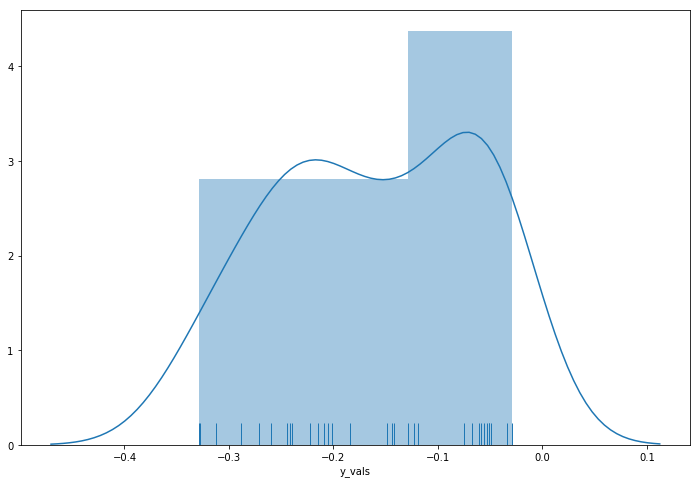

In [457]:
lasts = plot_final_hist(train_curves)

In [476]:
f = open(folder_name + '/extra_data.pkl', 'rb')
extra_data = pickle.load(f)
goals = pd.DataFrame(extra_data['goals'][48:], columns=["x", "y", "z"])
goals.head()

,x,y,z
0,0.126889,0.709995,0.38
1,-0.144488,0.589712,0.38
2,0.029259,0.482881,0.38
3,0.084289,0.754078,0.38
4,0.021850,0.481600,0.38


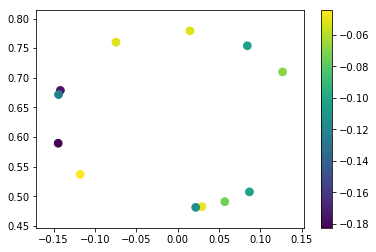

In [477]:
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib notebook
goals['reward'] = lasts
goals.sort_values("reward", ascending=False)
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# sc = ax.scatter(goals['x'], goals['y'], goals['z'], c=goals['reward'], s=60)
ax = fig.gca()
sc = ax.scatter(goals['x'], goals['y'], c=goals['reward'], s=60)
plt.colorbar(sc)

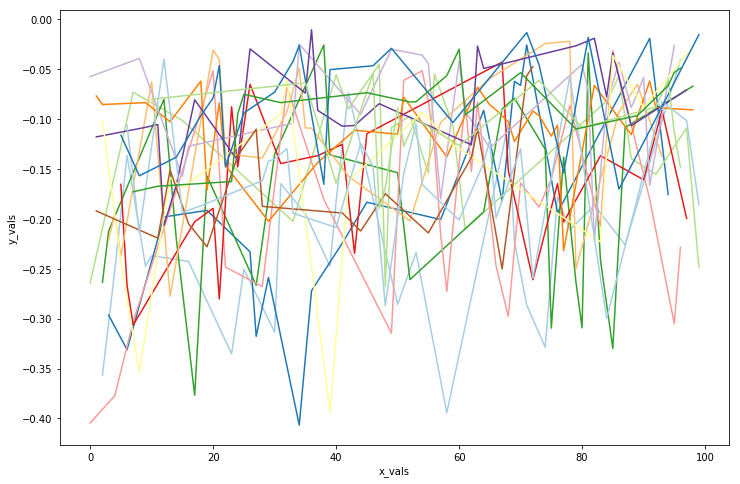

In [436]:
%matplotlib inline
plot_data(train_curves, show_legend=False)

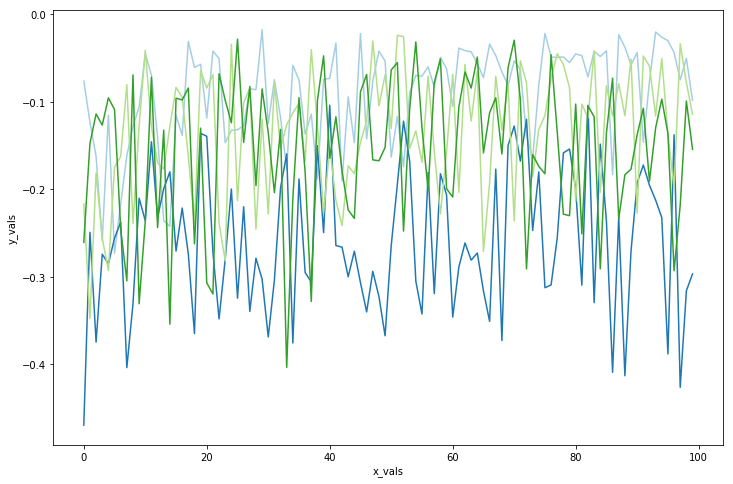

In [437]:
plot_data(test_curves)

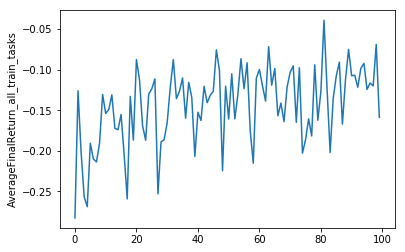

In [438]:
x = data[["AverageFinalReturn_all_train_tasks"]]
sns.lineplot(x = x.index, y = x.iloc[:, 0])

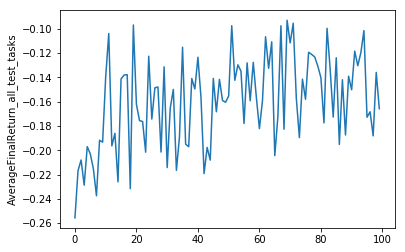

In [439]:
x = data[["AverageFinalReturn_all_test_tasks"]]
sns.lineplot(x = x.index, y = x.iloc[:, 0])